# Classification and Error Metrics

## Introduction
After data analysis and visualization, identify the key features, convert them to suitable numeric format, and use only the processed features for further processing and prediction. Plot and observe the spread of the disease in other countries and identify top countries whose data can be used to predict the spread in Pakistan.

# Section 1

In this section will use [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) to classify if a patient will survive the COVID-19. You will use `COVID19_line_list_data.csv` and `COVID19_open_line_list.csv` for this assignment.

## Question 1
Explore both the CSVs mentioned above and argue which has more useful features for correctly classifying if a patient is likely to survive the COVID-19. Mention specific features from both files that will and will not correlate to the target (outcome).

In [0]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path1 = "drive/My Drive/Colab Notebooks/COVID19_line_list_data.csv"
path2 = "drive/My Drive/Colab Notebooks/latestdata.csv"
dataset1 = pd.read_csv(path1)
dataset2 = pd.read_csv(path2)

y=list(dataset1.columns.values)
print(y[:])
x=list(dataset2.columns.values)
print(x[:])



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'summary', 'location', 'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated', 'hosp_visit_date', 'exposure_start', 'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered', 'symptom', 'source', 'link', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26']
['ID', 'age', 'sex', 'city', 'province', 'country', 'latitude', 'longitude', 'geo_resolution', 'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'symptoms', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 'reported_market_exposure', 'additional_information', 'chronic_disease_binary', 'chronic_disease', 'source', 'sequence_available', 'outcome', 'date_death_or_discharge', 'notes_for_discussion', 'location', 'admin3', 'admin2', 'admin1', 'country_new

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

dataset3 = pd.read_csv('drive/My Drive/Colab Notebooks/latestdata.csv',skipinitialspace=True, 
 usecols=['ID', 'age', 'sex',  'geo_resolution', 'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation', 'symptoms', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 'reported_market_exposure', 'additional_information', 'chronic_disease_binary', 'chronic_disease', 
          'source', 'sequence_available', 'outcome', 'date_death_or_discharge', 'notes_for_discussion', 'location',])


categorical_feat_mask = dataset3.dtypes==object
categorical_cols = dataset3.columns[categorical_feat_mask].tolist()

label_enc = LabelEncoder()
dataset3[categorical_cols] = dataset3[categorical_cols].apply(lambda col: label_enc.fit_transform((col).astype(str)))
dataset3[categorical_cols]
dataset3.corr()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,9,10,12,13,14,15,16,17,18,19,21,22,23,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,age,sex,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location
ID,1.000000,0.065172,0.060423,0.080182,0.045839,0.065304,0.485430,0.065351,-0.053113,0.039628,0.052249,0.020118,0.147791,0.041307,0.008873,-0.021587,0.073102,0.017353,0.034692,0.042018,0.042645
age,0.065172,1.000000,0.786545,-0.042762,0.393959,0.219532,0.077869,0.172694,-0.187976,0.293751,0.330697,0.072710,0.295394,0.102837,0.036299,-0.051957,0.100582,-0.026011,0.104987,0.054037,0.127406
sex,0.060423,0.786545,1.000000,-0.051455,0.397079,0.245556,0.074131,0.190964,-0.202257,0.277598,0.350320,0.078350,0.304197,0.141623,0.063821,-0.061990,0.104264,0.029371,0.131368,0.038770,0.144392
geo_resolution,0.080182,-0.042762,-0.051455,1.000000,-0.051379,-0.053475,-0.039239,-0.014930,0.052188,-0.030797,-0.026558,-0.015021,-0.121524,-0.023795,-0.005226,-0.043097,-0.009970,0.011844,-0.029141,0.006531,-0.299274
date_onset_symptoms,0.045839,0.393959,0.397079,-0.051379,1.000000,0.407281,0.046583,0.273521,-0.191265,0.445756,0.172218,0.017765,0.206735,0.151756,0.069150,-0.054988,0.028788,0.006922,0.133830,0.001677,0.161331
date_admission_hospital,0.065304,0.219532,0.245556,-0.053475,0.407281,1.000000,0.072152,0.251251,-0.265091,0.225904,0.133044,0.038383,0.180820,0.190658,0.067766,-0.004570,0.045099,0.016609,0.193171,0.005186,0.089518
date_confirmation,0.485430,0.077869,0.074131,-0.039239,0.046583,0.072152,1.000000,0.043283,-0.013776,0.019918,0.064510,0.035187,0.090537,0.045348,-0.002321,0.114997,0.061645,0.002701,0.024538,-0.001193,0.054937
symptoms,0.065351,0.172694,0.190964,-0.014930,0.273521,0.251251,0.043283,1.000000,-0.195745,0.175308,0.098284,0.000341,0.202648,0.143615,0.166867,-0.001244,0.014442,0.226206,0.133406,0.019995,0.047918
lives_in_Wuhan,-0.053113,-0.187976,-0.202257,0.052188,-0.191265,-0.265091,-0.013776,-0.195745,1.000000,-0.268580,-0.104346,-0.038609,-0.130034,-0.067488,-0.066842,-0.028180,-0.019057,-0.023984,-0.121602,-0.010272,-0.087001
travel_history_dates,0.039628,0.293751,0.277598,-0.030797,0.445756,0.225904,0.019918,0.175308,-0.268580,1.000000,0.322653,-0.000657,0.098934,0.017905,0.020456,-0.021393,0.010863,-0.007663,0.068856,0.052295,0.107393


# **Answer 1**



By examing the files,I conclude that dataset2 i.e 
COVID19_open_line_list.csv(latest dataset from github) has more useful features for correctly classifying if a patient is likely to survive covid-19.It contains an outcome column which tells whether a patient has recovered,died,is stable etc.Specific features from this file that will correlate to the target are:
*    age
*   sex
*   date_onset_symptoms
*   date_admission_hospital
*   date_confirmation
* symptoms
*   chronic_disease_binary
*  chronic_disease

**Features that will not correlate:'ID','city', 'province', 'country', 'wuhan(0)_not_wuhan(1)', 'latitude', 'longitude', 'geo_resolution', 'lives_in_Wuhan', 'travel_history_dates', 'travel_history_location', 'reported_market_exposure', 'additional_information', , 'source', 'sequence_available', 'outcome', 'date_death_or_discharge', 'notes_for_discussion', 'location'.



> This has been concluded by the correlation matrix.The factors that have highest relation with outcome are selected.**


From COVID19_line_list_data.csv the features that will correlate are:

*   gender
*   age
*   symptom_onset
*   If_onset_approximated
*   hosp_visit_date
*   reporting date
*   symptom





All the other features will not correlate.
'id', 'case_in_country', 'Unnamed: 3', 'summary', 'location', 'country', , 'exposure_start', 'exposure_end', 'visiting Wuhan', 'from Wuhan', 'death', 'recovered', 'source', 'link',


## Question 2

Import the chosen file and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Remove extra feature columns
* Encode the non-numeric values as an integer
* Determine the breakdown of target values

In [0]:
#examining datatypes
dataset=dataset2
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267492 entries, 0 to 267491
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        267492 non-null  object 
 1   age                       15265 non-null   object 
 2   sex                       15322 non-null   object 
 3   city                      129899 non-null  object 
 4   province                  249548 non-null  object 
 5   country                   267417 non-null  object 
 6   latitude                  243214 non-null  float64
 7   longitude                 243214 non-null  float64
 8   geo_resolution            243214 non-null  object 
 9   date_onset_symptoms       4226 non-null    object 
 10  date_admission_hospital   1849 non-null    object 
 11  date_confirmation         265946 non-null  object 
 12  symptoms                  1743 non-null    object 
 13  lives_in_Wuhan            4266 non-null    o

**The columns that we need to use are of object type which would be converted to numerc type.So floating point values need not to be scaled as they are not to be used.**

---



In [0]:
#removing extra features

dataset.drop(["city", "province", "country",  "latitude", "longitude",
              "geo_resolution","lives_in_Wuhan", "travel_history_dates", "travel_history_location",
              "reported_market_exposure", "additional_information","source", "sequence_available",
              "date_death_or_discharge", "notes_for_discussion", 'admin3', 'admin2', 'admin1', 'country_new',
              'admin_id', 'data_moderator_initials', 'travel_history_binary'], axis = 1, inplace = True) 
dataset.head(10)

,ID,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,chronic_disease_binary,chronic_disease,outcome,location
0,000-1-1,60-69,female,NaN,NaN,10.03.2020,NaN,NaN,NaN,NaN,NaN
1,000-1-1,30,male,18.01.2020,20.01.2020,22.01.2020,NaN,NaN,NaN,NaN,NaN
2,000-1-10,30,male,17.01.2020,22.01.2020,23.01.2020,NaN,NaN,NaN,NaN,NaN
3,000-1-10,60-69,female,NaN,NaN,11.03.2020,NaN,NaN,NaN,NaN,NaN
4,000-1-100,44,male,NaN,NaN,07.03.2020,NaN,NaN,NaN,NaN,NaN
5,000-1-100,65,female,03.01.2020,10.01.2020,21.01.2020,"cough, fever, weakness",NaN,NaN,NaN,NaN
6,000-1-1000,NaN,NaN,NaN,NaN,26.01.2020,NaN,NaN,NaN,NaN,NaN
7,000-1-1000,NaN,NaN,NaN,NaN,12.03.2020,NaN,All travel linked or linked to prior cases,NaN,NaN,NaN
8,000-1-10000,8-68,NaN,NaN,NaN,15.02.2020,NaN,NaN,NaN,NaN,NaN
9,000-1-10001,8-68,NaN,NaN,NaN,15.02.2020,NaN,NaN,NaN,NaN,NaN


In [0]:
#dropping rows which have null value for outcome

dataset.dropna(subset=['outcome'], inplace=True)
print(dataset)

                 ID    age  ...                        outcome location
21      000-1-10011  21-72  ...                         stable      NaN
22      000-1-10012  21-72  ...                         stable      NaN
23      000-1-10013  21-72  ...                         stable      NaN
24      000-1-10014  21-72  ...                         stable      NaN
25      000-1-10015  21-72  ...                         stable      NaN
...             ...    ...  ...                            ...      ...
204565        005-5  80-89  ...                          death      NaN
204566       005-50  40-49  ...  recovering at home 03.03.2020  Seattle
213703     005-6014    80-  ...                          death      NaN
216128       005-82  90-99  ...                          death      NaN
217083      005-906  50-59  ...                      recovered      NaN

[1008 rows x 11 columns]


In [0]:
#Encode the non-numeric values as an integer using label encoder

categorical_feat_mask = dataset.dtypes==object
categorical_cols = dataset.columns[categorical_feat_mask].tolist()

label_enc = LabelEncoder()
dataset[categorical_cols] = dataset[categorical_cols].apply(lambda col: label_enc.fit_transform((col).astype(str)))
print(dataset)


          ID  age  sex  ...  chronic_disease  outcome  location
21         0   16    2  ...               62       26        61
22         1   16    2  ...               62       26        61
23         2   16    2  ...               62       26        61
24         3   16    2  ...               62       26        61
25         4   16    2  ...               62       26        61
...      ...  ...  ...  ...              ...      ...       ...
204565  1000   88    0  ...               62       16        61
204566  1001   39    0  ...               62       22        46
213703  1002   87    0  ...               62       16        61
216128  1003   99    0  ...               62       16        61
217083  1004   52    1  ...               62       21        61

[1008 rows x 11 columns]


In [0]:
dataset.info() #object type has been converted to int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 21 to 217083
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ID                       1008 non-null   int64
 1   age                      1008 non-null   int64
 2   sex                      1008 non-null   int64
 3   date_onset_symptoms      1008 non-null   int64
 4   date_admission_hospital  1008 non-null   int64
 5   date_confirmation        1008 non-null   int64
 6   symptoms                 1008 non-null   int64
 7   chronic_disease_binary   1008 non-null   int64
 8   chronic_disease          1008 non-null   int64
 9   outcome                  1008 non-null   int64
 10  location                 1008 non-null   int64
dtypes: int64(11)
memory usage: 94.5 KB


In [0]:
#Determine the breakdown of target values
print("Following labels have occured in the given frequency")
#label_inc.reverse_transform(dataset['outcome'])
dataset['outcome'].value_counts()



Following labels have occured in the given frequency


18    161
26    156
17    149
12    133
19     95
8      88
21     60
16     47
27     42
0      14
2      13
10     11
9       6
23      4
7       4
15      3
6       2
5       2
14      2
11      2
28      2
20      2
22      2
24      2
13      1
4       1
3       1
25      1
1       1
29      1
Name: outcome, dtype: int64

## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.

In [0]:
#splitting data
from sklearn.model_selection import train_test_split

training_dataset, test_dataset = train_test_split(dataset, test_size=0.2)

print(training_dataset)
print("Frequency of classes in training dataset")
training_dataset['outcome'].value_counts()



        ID  age  sex  ...  chronic_disease  outcome  location
69310  594   62    1  ...               62       27        61
61178  286   49    0  ...               24       17        61
60384  283   68    0  ...               62       17        61
83587  823   77    0  ...               49       17        61
72430  701  103    2  ...               62       16        41
...    ...  ...  ...  ...              ...      ...       ...
70696  627   18    2  ...               62       26        61
69779  611   26    1  ...               62       10        61
39809  183   62    0  ...               62       19         5
69257  547  103    2  ...               62        8        61
62731  299   74    0  ...               62       17        61

[806 rows x 11 columns]
Frequency of classes in training dataset


18    132
26    124
17    120
12     97
19     78
8      76
21     44
16     39
27     35
0      13
2      12
10      5
9       5
7       4
23      4
6       2
5       2
15      2
14      2
11      1
28      1
20      1
22      1
24      1
4       1
3       1
25      1
1       1
29      1
Name: outcome, dtype: int64

In [0]:
print(test_dataset)
print("\n\nFrequency of classes in test dataset")
test_dataset['outcome'].value_counts()

        ID  age  sex  ...  chronic_disease  outcome  location
21149  127   21    0  ...               62       18        54
67245  383  103    2  ...               62       12        61
70152  617   15    1  ...               62       10        61
67267  403  103    2  ...               62       12        61
1575    39   24    1  ...               62       18        61
...    ...  ...  ...  ...              ...      ...       ...
69229  521  103    2  ...               62        8        61
67241  380  103    2  ...               62       12        61
69208  502  103    2  ...               62        8        61
44101  237   18    2  ...               62       26        61
56884  275   93    0  ...               62       17        61

[202 rows x 11 columns]


Frequency of classes in test dataset


12    36
26    32
18    29
17    29
19    17
21    16
8     12
16     8
27     7
10     6
2      1
9      1
11     1
28     1
13     1
15     1
20     1
22     1
24     1
0      1
Name: outcome, dtype: int64

# **Answer**
The data has been deivide in ratio 4:1 i.e 80% training and 20% test data.

## Question 4

Let's now fit a Naive Bayes classifier to this data in order to predict "outcome".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns).Choices are:
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

**Answer** 
I guess MultinomialNB will be used,this is because BernolliNB is used when we have discrete true or false i.e 2 outcomes.Whereas GaussianNB is used for continuous data.In this case we are using outcome column as the target.It contains 30 different values for which multinomialNB is suitable.

In [0]:
#multinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


X=training_dataset.drop(columns=['outcome'])
Y=training_dataset['outcome']

x_test=test_dataset.drop(columns=['outcome'])
y_test=test_dataset['outcome']

covid1= MultinomialNB()
covid1.fit(X, Y)
print("Cross value score by MultinomialNB is", cross_val_score(covid1,X,Y,cv=2))
print('\n')


y_pred = covid1.predict(x_test)
accuracyMNB=metrics.accuracy_score(y_test, y_pred)
precisionMNB = precision_score(y_test, y_pred, average='weighted')
recallMNB = recall_score(y_test, y_pred, average='weighted')
scoreMNB = f1_score(y_test, y_pred, average='weighted')
CM_MNB=confusion_matrix(y_test, y_pred)


Cross value score by MultinomialNB is [0.28287841 0.34243176]




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Question 5

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [0]:
#gaussian
from sklearn.naive_bayes import GaussianNB

covid2 = GaussianNB() 
covid2.fit(X, Y)

print("Cross value score by GaussianNB is", cross_val_score(covid2,X,Y,cv=2))
print("\n")

y_pred = covid2.predict(x_test)
accuracyGNB=metrics.accuracy_score(y_test, y_pred)
precisionGNB = precision_score(y_test, y_pred, average='weighted')
recallGNB = recall_score(y_test, y_pred, average='weighted')
scoreGNB = f1_score(y_test, y_pred, average='weighted')
CM_GNB=confusion_matrix(y_test, y_pred)


Cross value score by GaussianNB is [0.58312655 0.52605459]




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#bernoulli
from sklearn.naive_bayes import BernoulliNB

covid3 = BernoulliNB()
covid3.fit(X, Y)
print("Cross value score by BernoulliNB is", cross_val_score(covid3,X,Y,cv=2))
print('\n')

y_pred = covid3.predict(x_test)
accuracyBNB=metrics.accuracy_score(y_test, y_pred)
precisionBNB = precision_score(y_test, y_pred, average='weighted')
recallBNB = recall_score(y_test, y_pred, average='weighted')
scoreBNB = f1_score(y_test, y_pred, average='weighted')
CM_BNB=confusion_matrix(y_test, y_pred)

Cross value score by BernoulliNB is [0.31761787 0.28784119]




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Answer** Bernolli is behaving like this because we have more than two target classes,whereas it can classify only 2 output classes.

## Question 6

For each model, calculate the following error metrics: 

* accuracy
* precision
* recall
* fscore
* confusion matrix (plot)

In [0]:
#All the parameters have been calculated above with all the classifiers
#values are printed here

#accuracy
print("Accuracy for the dataset by multinomialNB is",accuracyMNB)
print("Accuracy for the dataset by bernolliNB is",accuracyBNB)
print("Accuracy for the dataset by gaussianNB is",accuracyGNB)
print('\n')

#precision
print("Precision for the dataset by multinomialNB is",precisionMNB)
print("Precision for the dataset by bernolliNB is",precisionBNB)
print("Precision for the dataset by gaussianNB is",precisionGNB)
print('\n')
#print('Precision: %.3f' % precision)

#recall

print("recall for the dataset by multinomialNB is",recallMNB)
print("Recall for the dataset by bernolliNB is",recallBNB)
print("Recall for the dataset by gaussianNB is",recallGNB)
print('\n')
#print('Recall: %.3f' % recall)

#fscore
print("fscore for the dataset by multinomialNB is",scoreMNB)
print("fscore for the dataset by bernolliNB is",scoreBNB)
print("fscore for the dataset by gaussianNB is",scoreGNB)
print('\n')
#print('F-Measure: %.3f' % score)


#confusion-matrix
print("Confusion matrix for the dataset by multinomialNB is",CM_MNB)
print("Confusion matrix  for the dataset by bernolliNB is",CM_BNB)
print("Confusion matrix  for the dataset by gaussianNB is",CM_GNB)





Accuracy for the dataset by multinomialNB is 0.3613861386138614
Accuracy for the dataset by bernolliNB is 0.2623762376237624
Accuracy for the dataset by gaussianNB is 0.5099009900990099


Precision for the dataset by multinomialNB is 0.5191948315710692
Precision for the dataset by bernolliNB is 0.17346234623462345
Precision for the dataset by gaussianNB is 0.6385433415136385


recall for the dataset by multinomialNB is 0.3613861386138614
Recall for the dataset by bernolliNB is 0.2623762376237624
Recall for the dataset by gaussianNB is 0.5099009900990099


fscore for the dataset by multinomialNB is 0.3870321394242274
fscore for the dataset by bernolliNB is 0.1708078152396204
fscore for the dataset by gaussianNB is 0.5303239686903053


Confusion matrix for the dataset by multinomialNB is [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 

## Question 7
Let's dive more into the feature analysis.
* Create a bar plot showing the correlations between each column and `outcome`
* Pick the most 5 correlated fields (using the absolute value of correlations) and create new `X`
* Re-train your chosen Naive Bayes classifier to this data, and compare results

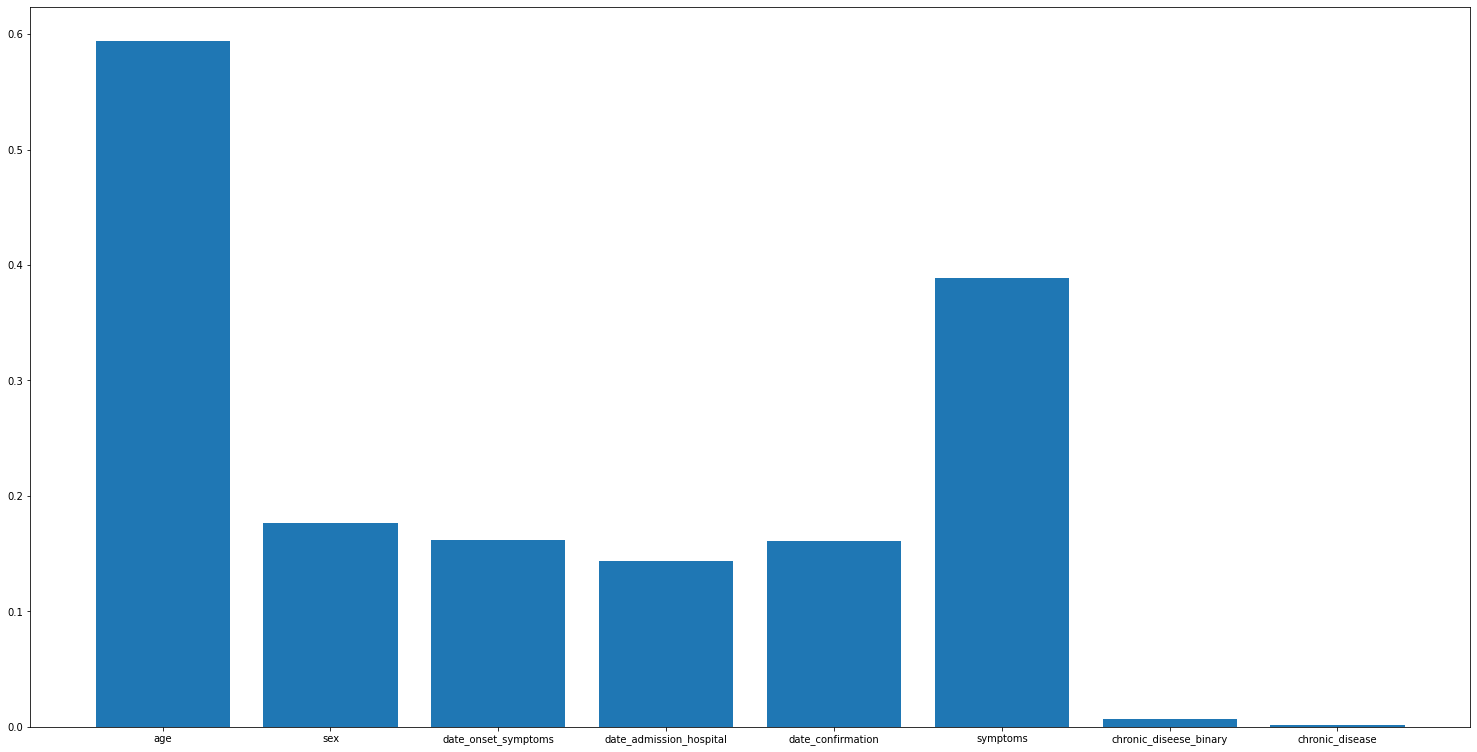

In [0]:
import matplotlib.pyplot as plt
import numpy 

dataset.corr()
one=abs(training_dataset['age'].corr(training_dataset['outcome']))
two=abs(training_dataset['sex'].corr(training_dataset['outcome']))
three=abs(training_dataset['date_onset_symptoms'].corr(training_dataset['outcome']))
four=abs(training_dataset['date_admission_hospital'].corr(training_dataset['outcome']))
five=abs(training_dataset['date_confirmation'].corr(training_dataset['outcome']))
six=abs(training_dataset['symptoms'].corr(training_dataset['outcome']))
seven=abs(training_dataset['chronic_disease_binary'].corr(training_dataset['outcome']))
eight=abs(training_dataset['chronic_disease'].corr(training_dataset['outcome']))
correlation=[one,two,three,four,five,six,seven,eight]

'''correlation.append(one)
correlation.extend((two,three,four,five,six,seven,eight))'''

features=['age','sex','date_onset_symptoms','date_admission_hospital','date_confirmation',
          'symptoms','chronic_diseese_binary','chronic_disease']

fig = plt.figure(figsize=(20,10))
ax = fig.add_axes([0,0,1,1])
ax.bar(features,correlation)
plt.show()


<hr>

In [0]:
print(training_dataset)

        ID  age  sex  ...  symptoms  outcome  location
69310  594   62    1  ...        97       27        61
61178  286   49    0  ...        49       17        61
60384  283   68    0  ...       103       17        61
83587  823   77    0  ...        11       17        61
72430  701  103    2  ...        97       16        41
...    ...  ...  ...  ...       ...      ...       ...
70696  627   18    2  ...        97       26        61
69779  611   26    1  ...        97       10        61
39809  183   62    0  ...        97       19         5
69257  547  103    2  ...         0        8        61
62731  299   74    0  ...        83       17        61

[806 rows x 8 columns]


In [0]:

print('five most correlated fields are age,symptoms,date_confirmation,sex,date_onset_symptoms')
training_dataset.drop(['date_admission_hospital','chronic_disease_binary','chronic_disease','location'], axis = 1, inplace = True)
x_train=training_dataset
Y=training_dataset['outcome']
covid4= MultinomialNB()
covid4.fit(x_train, Y)
print("Cross value score by MultinomialNB is", cross_val_score(covid4,x_train,Y,cv=2))
print('\n')



five most correlated fields are age,symptoms,date_confirmation,sex,date_onset_symptoms
Cross value score by MultinomialNB is [0.37965261 0.35235732]




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


**The results are now a bit better than before**

# Section 2

In this section will use [Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE](https://github.com/CSSEGISandData/COVID-19) to observe the spreading trend of COVID-19. You are required to use the data reported till **31-March-2020**.

## Question 1
Use `time_series_covid19_confirmed_global.csv` and plot the trend of disease spread in 10 most affected countries.

In [0]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy

drive.mount('/content/drive')
path = "drive/My Drive/Colab Notebooks/time_series_covid19_confirmed_global.csv"
dataset_2 = pd.read_csv(path)
dataset_2.drop(['4/1/20', '4/2/20', '4/3/20' ,'4/4/20','4/5/20', '4/6/20', '4/7/20', '4/8/20' ,'4/9/20' ,'4/10/20' ,'4/11/20',
 '4/12/20' ,'4/13/20', '4/14/20'], axis = 1, inplace = True) 

#getting most effected countries
grouped=dataset_2.groupby('Country/Region')[dataset_2.columns].sum()

sort= grouped.sort_values('3/31/20', ascending=False,inplace=True)
print( grouped.head(10))







Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                      Lat       Long  1/22/20  ...  3/29/20  3/30/20  3/31/20
Country/Region                                 ...                           
US                37.0902   -95.7129        1  ...   140909   161831   188172
Italy             43.0000    12.0000        0  ...    97689   101739   105792
Spain             40.0000    -4.0000        0  ...    80110    87956    95923
China           1083.3367  3684.4197      548  ...    82122    82198    82279
Germany           51.0000     9.0000        0  ...    62095    66885    71808
France            91.3624    59.7192        0  ...    40708    45170    52827
Iran              32.0000    53.0000        0  ...    38309    41495    44605
United Kingdom   270.0299  -482.9247        0  ...    19780    22453    25481
Switzerland       46.8182     8.2275        0  ...    14829    15922    16605
Turkey       

Text(0.5, 1.0, 'Most affected Countries')

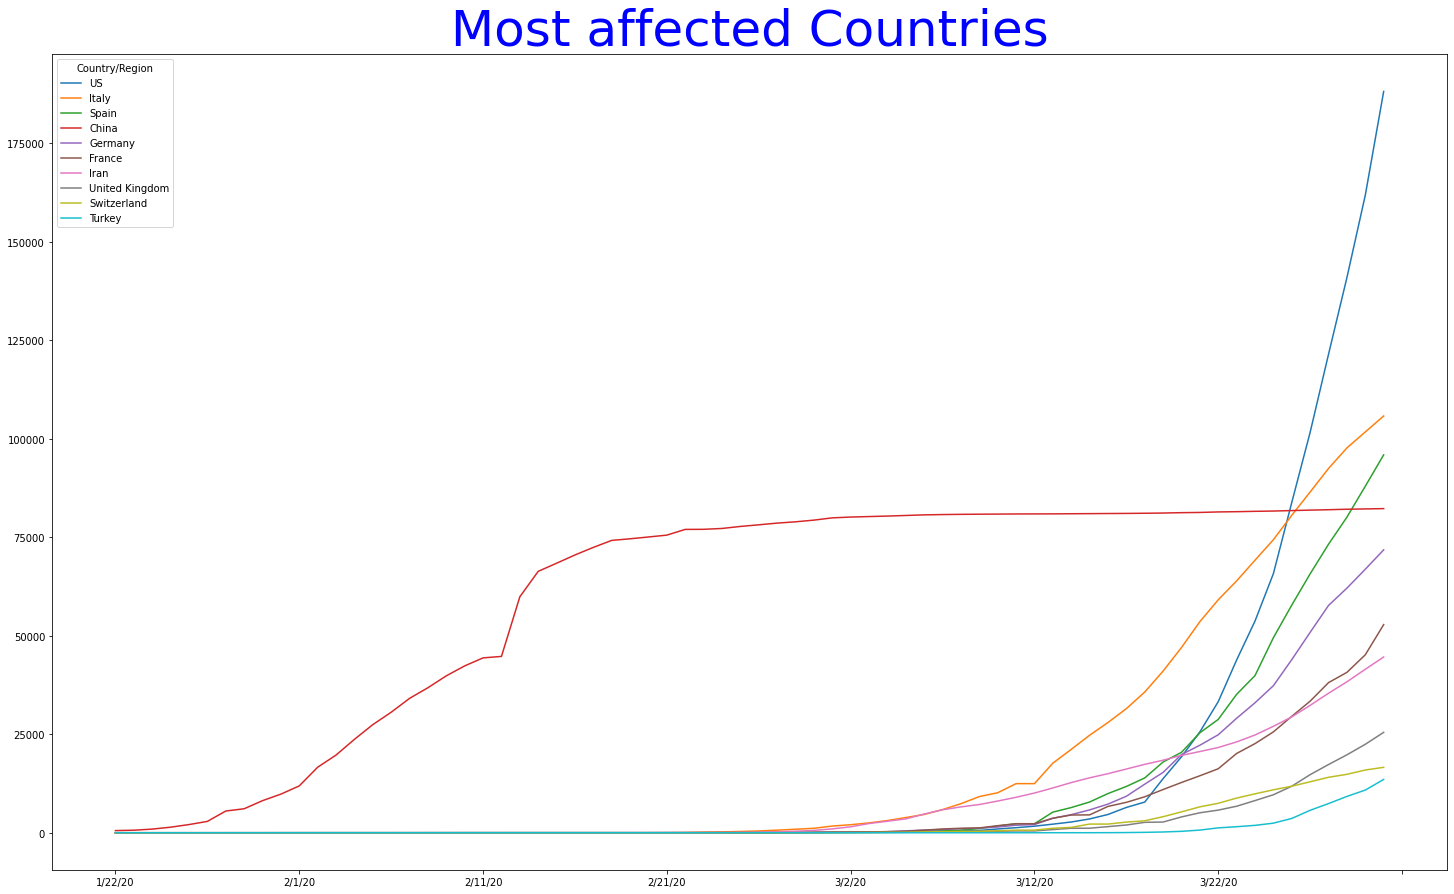

In [0]:
#plotting graph
import matplotlib.pyplot as plt
g1=grouped.drop(['Lat','Long'],axis=1)
g2=g1.iloc[:10]
data_plot=g2.T
data_plot.plot(figsize=(25,15))
plt.title("Most affected Countries",fontsize=50,color='blue')


## Question 2
Use `csse_covid_19_daily_reports` to compare the mortality and survival rates in 10 most affected countries as of 31-March-2020.

In [0]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy

#getting most effected countries based onnumber of confirmed cases

drive.mount('/content/drive')
path_31 = "drive/My Drive/Colab Notebooks/03-31-2020.csv"
dataset_3 = pd.read_csv(path_31)
group=dataset_3.groupby('Country_Region')[dataset_3.columns].sum()
group.sort_values('Confirmed', ascending=False,inplace=True)
group.drop(['FIPS','Lat','Long_'],axis=1,inplace=True)
print(group.head(10))




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                Confirmed  Deaths  Recovered  Active
Country_Region                                      
US                 188172    3873       7024       0
Italy              105792   12428      15729   77635
Spain               95923    8464      19259   68200
China               82279    3309      76200    2770
Germany             71808     775      16100   54933
France              52827    3532       9513   39782
Iran                44605    2898      14656   27051
United Kingdom      25481    1793        179   23509
Switzerland         16605     433       1823   14349
Turkey              13531     214        243   13074


Mortality and survival rates are:
mortality rate for  US is 2.0582233275939035
survival rate for  US is 3.7327551389154605 

mortality rate for  Italy is 11.747580157289777
survival rate for  Italy is 14.86785390199637 

mortality rate for  Spain is 8.823744044702522
survival rate for  Spain is 20.077562211357026 

mortality rate for  China is 4.021682324773028
survival rate for  China is 92.6117235260516 

mortality rate for  Germany is 1.0792669340463457
survival rate for  Germany is 22.42090017825312 

mortality rate for  France is 6.68597497491813
survival rate for  France is 18.00783690158442 

mortality rate for  Iran is 6.497029480999888
survival rate for  Iran is 32.85730299293801 

mortality rate for  United Kingdom is 7.036615517444371
survival rate for  United Kingdom is 0.7024842039166437 

mortality rate for  Switzerland is 2.6076482987052096
survival rate for  Switzerland is 10.978620897320084 

mortality rate for  Turkey is 1.5815534698100657
survival rate for  Turkey is

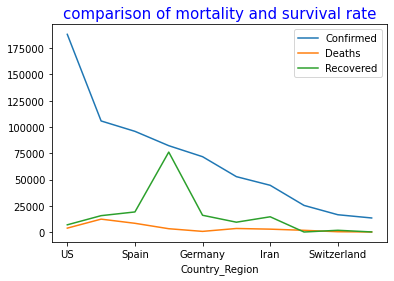

In [0]:
#rate calculation

final=group.iloc[:10]
#group.drop(['Active'],axis=1,inplace=True)
final.plot()
plt.title("comparison of mortality and survival rate",fontsize=15,color='blue')
print("Mortality and survival rates are:")
final.to_numpy()
t=final['Confirmed']
t1=final['Deaths']
t2=final['Recovered']
c=['US','Italy','Spain','China','Germany','France','Iran','United Kingdom','Switzerland','Turkey']
for i in range(0,10):
  print('mortality rate for ',c[i],'is',(t1[i]/t[i])*100)
  print('survival rate for ',c[i] ,'is',(t2[i]/t[i])*100,'\n')

## Question 3
Identify top 5 countries (min 1000 cases) which have same spread trend as **Pakistan**. Compare progression of virus in 7 days moving window of these countries in terms of confirmed cases, deaths, and recoveries.

In [0]:
drive.mount('/content/drive')

dataset4 = pd.read_csv('drive/My Drive/Colab Notebooks/03-31-2020.csv',skipinitialspace=True, 
 usecols=['Country_Region', 'Confirmed', 'Deaths',  'Recovered', 'Active',])
new2=dataset4.groupby('Country_Region')[dataset4.columns].sum()

new3=new2.T
new3.corr()
#cant figure out how to get values for correlations with pakistan from this matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Country_Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),...,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Country_Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.965636,0.998029,0.999951,0.889395,0.999248,0.964900,0.999391,0.998285,0.995781,0.997757,0.998627,0.694538,0.661887,0.999248,0.923226,0.990441,0.999248,0.995287,0.999248,0.998926,0.999871,0.955630,0.999892,0.893085,0.999882,0.992322,0.998434,0.999248,0.984594,0.973145,0.999958,0.520862,0.999248,0.999248,0.999349,0.067548,0.999968,0.999248,0.997767,...,0.998311,0.030280,0.993684,0.995984,0.966679,0.999523,0.999248,0.999248,0.952870,0.999465,0.999836,0.976757,0.999768,0.965898,0.994361,0.889395,0.999248,0.999483,0.995375,0.975288,0.994038,0.999003,0.974181,0.999248,0.928682,0.999763,0.999747,0.999901,0.586068,0.999248,0.999895,0.997342,0.998398,0.994028,0.999849,0.933519,0.945797,0.988998,0.999248,0.992631
Albania,0.965636,1.000000,0.977268,0.965630,0.931496,0.955830,0.998774,0.971527,0.976771,0.984092,0.980049,0.974674,0.852523,0.833776,0.955830,0.987990,0.992106,0.955830,0.983477,0.955830,0.958979,0.969397,0.932541,0.964586,0.975686,0.969187,0.990185,0.959205,0.955830,0.953245,0.996341,0.965386,0.708575,0.955830,0.955830,0.971554,0.320175,0.966742,0.955830,0.965425,...,0.975981,0.282404,0.974664,0.983041,0.996676,0.957148,0.955830,0.955830,0.995728,0.958150,0.960779,0.995785,0.962513,0.999232,0.986506,0.931496,0.955830,0.959484,0.985798,0.947049,0.987089,0.973870,0.996811,0.955830,0.991626,0.961480,0.959832,0.962118,0.745958,0.955830,0.962151,0.980351,0.961374,0.985805,0.967993,0.992659,0.994028,0.991495,0.955830,0.957744
Algeria,0.998029,0.977268,1.000000,0.998334,0.914865,0.994870,0.974699,0.997866,0.997771,0.997280,0.998401,0.997546,0.723749,0.698436,0.994870,0.937273,0.996082,0.994870,0.996255,0.994870,0.997266,0.998885,0.965929,0.998230,0.910130,0.998429,0.997230,0.997324,0.994870,0.989264,0.979980,0.998265,0.572264,0.994870,0.994870,0.997786,0.112128,0.997988,0.994870,0.998514,...,0.997504,0.073105,0.998115,0.997018,0.974648,0.995972,0.994870,0.994870,0.963126,0.995444,0.996892,0.982896,0.996573,0.978691,0.996570,0.914865,0.994870,0.997209,0.997797,0.982125,0.996466,0.999830,0.981191,0.994870,0.943553,0.997554,0.996907,0.997067,0.635705,0.994870,0.997468,0.997797,0.997833,0.995720,0.997872,0.947396,0.956794,0.992725,0.994870,0.994760
Andorra,0.999951,0.965630,0.998334,1.000000,0.892961,0.999028,0.964406,0.999106,0.997932,0.995450,0.997518,0.998250,0.692963,0.661648,0.999028,0.922262,0.990538,0.999028,0.994814,0.999028,0.999278,0.999883,0.958470,0.999983,0.892012,0.999774,0.992422,0.998902,0.999028,0.986269,0.972400,0.999999,0.524122,0.999028,0.999028,0.999049,0.065903,0.999853,0.999028,0.998374,...,0.997921,0.028221,0.994590,0.995591,0.965883,0.999477,0.999028,0.999028,0.952019,0.999228,0.999776,0.976044,0.999537,0.966276,0.994017,0.892961,0.999028,0.999664,0.995186,0.977413,0.993706,0.999228,0.973516,0.999028,0.928044,0.999867,0.999764,0.999800,0.590292,0.999028,0.999907,0.997011,0.998896,0.993560,0.999659,0.932807,0.944866,0.988511,0.999028,0.993776
Angola,0.889395,0.931496,0.914865,0.892961,1.000000,0.872872,0.912395,0.886997,0.890163,0.899002,0.897890,0.887037,0.752799,0.786185,0.87287

In [0]:
#second approach
#taking difference of confirmed cases for pakistan with other countries and then checking for which country the difference is least
import csv
import itertools
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')
path_4 = "drive/My Drive/Colab Notebooks/03-31-2020.csv"
dataset_4 = pd.read_csv(path_4)

#removing duplicate values by adding values for same countries into single row
dataset_4 = dataset_4.groupby("Country_Region")["Confirmed"].sum().reset_index()

#patients should be more than 1000
same=dataset_4[dataset_4.Confirmed>=1000]

#trend is to be checked for pakistan
pakistan=same[(same['Country_Region'] == 'Pakistan')]
arr=pakistan.values.tolist()

#removing pakistan from list
index_pak=same[(same['Country_Region'] == 'Pakistan')].index
same.drop(index_pak,inplace=True)

countries=same.values.tolist()


array_cd=[]
for i in range(len(countries)):
       count_diff=[]
       difference=abs((countries[i][1])-(arr[0][1]))
       count_diff.append(countries[i][0])
       count_diff.append(difference)
       array_cd.append(count_diff)

data=pd.DataFrame(array_cd)
data.columns=['Country','Difference']
frame=data.sort_values('Difference')

#getting top 5 countries having same trend as pakistan
frame2=frame.iloc[:5]
print(frame2)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
        Country  Difference
23        Japan          15
32  Philippines         146
25   Luxembourg         240
42     Thailand         287
11      Ecuador         302


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<hr>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Confirmed cases of 5 Countries with Similar Spread as Pakistan (7 days window)')

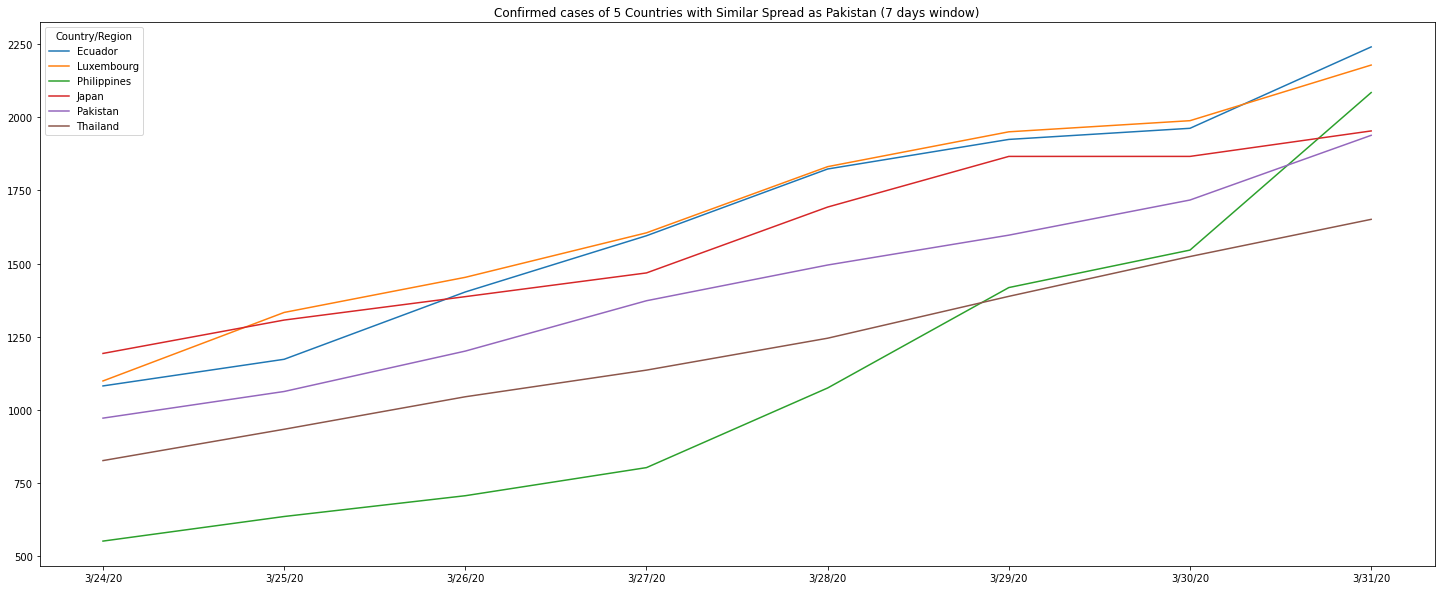

In [205]:
#moving windows for confirmed cases

import pandas as pd
import csv
import itertools
import numpy as np
drive.mount('/content/drive')
path = "drive/My Drive/Colab Notebooks/time_series_covid19_confirmed_global.csv"
dataset_2 = pd.read_csv(path)
dataset_2.drop(['4/1/20', '4/2/20', '4/3/20' ,'4/4/20','4/5/20', '4/6/20', '4/7/20', '4/8/20' ,'4/9/20' ,'4/10/20' ,'4/11/20',
 '4/12/20' ,'4/13/20', '4/14/20'], axis = 1, inplace = True) 
dataset_2.drop(dataset_2.columns[2:66],axis=1,inplace=True)
#getting most effected countries
grouped2=dataset_2.groupby('Country/Region')[dataset_2.columns].sum()

grouped2.sort_values('3/31/20', ascending=False,inplace=True)

final=grouped2.T    
def keep_cols(Data, keep_these):
    drop_these = list(set(list(Data)) - set(keep_these))
    return Data.drop(drop_these, axis = 1)

new_data = final.pipe(keep_cols, ['Pakistan', 'Japan','Philippines','Thailand','Ecuador','Luxembourg'])
new_data.plot(figsize=(25,10))
plt.title("Confirmed cases of 5 Countries with Similar Spread as Pakistan (7 days window)")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Death cases of 5 Countries with Similar Spread as Pakistan (7 days window)')

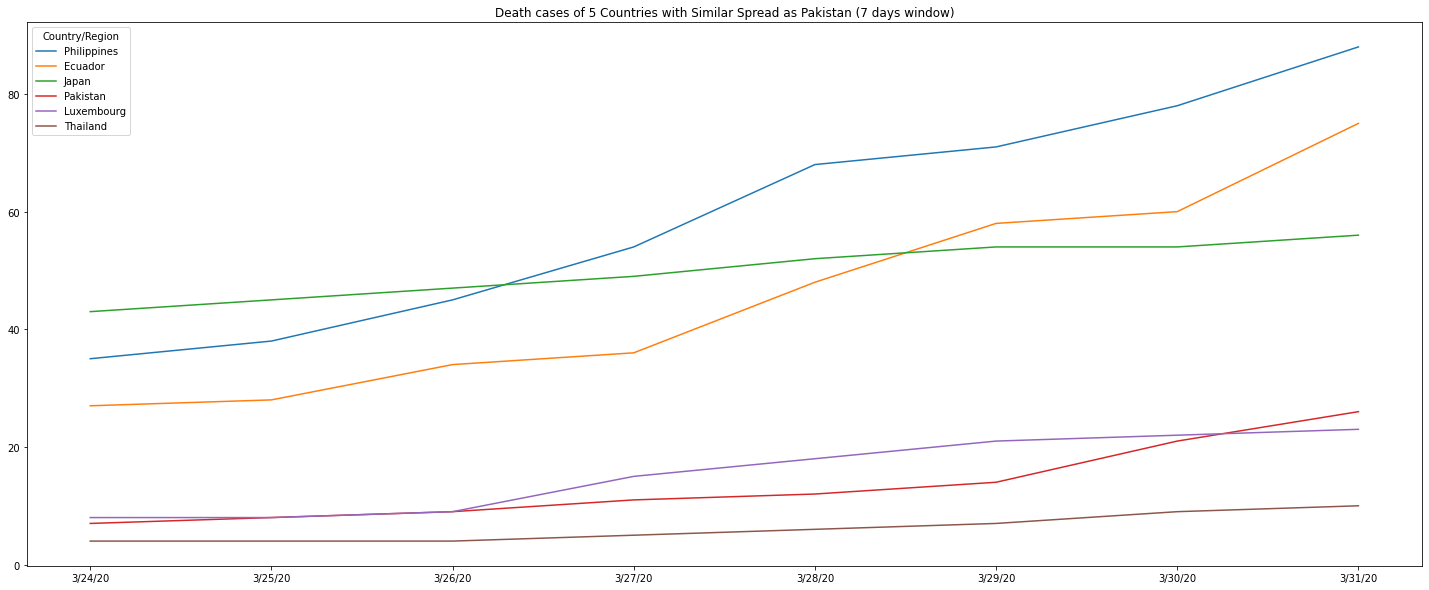

In [211]:
#recovered
import pandas as pd
import csv
import itertools
import numpy as np
drive.mount('/content/drive')
path = "time_series_covid19_deaths_global.csv"
dataset_2 = pd.read_csv(path)
dataset_2.drop(['4/1/20', '4/2/20', '4/3/20' ,'4/4/20','4/5/20', '4/6/20', '4/7/20', '4/8/20' ,'4/9/20' ,'4/10/20' ,'4/11/20',
 '4/12/20' ,'4/13/20', '4/14/20'], axis = 1, inplace = True) 
dataset_2.drop(dataset_2.columns[2:66],axis=1,inplace=True)
#getting most effected countries
grouped2=dataset_2.groupby('Country/Region')[dataset_2.columns].sum()

grouped2.sort_values('3/31/20', ascending=False,inplace=True)

final=grouped2.T    
def keep_cols(Data, keep_these):
    drop_these = list(set(list(Data)) - set(keep_these))
    return Data.drop(drop_these, axis = 1)

new_data = final.pipe(keep_cols, ['Pakistan', 'Japan','Philippines','Thailand','Ecuador','Luxembourg'])
new_data.plot(figsize=(25,10))
plt.title("Death cases of 5 Countries with Similar Spread as Pakistan (7 days window)")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Recovered cases of 5 Countries with Similar Spread as Pakistan (7 days window)')

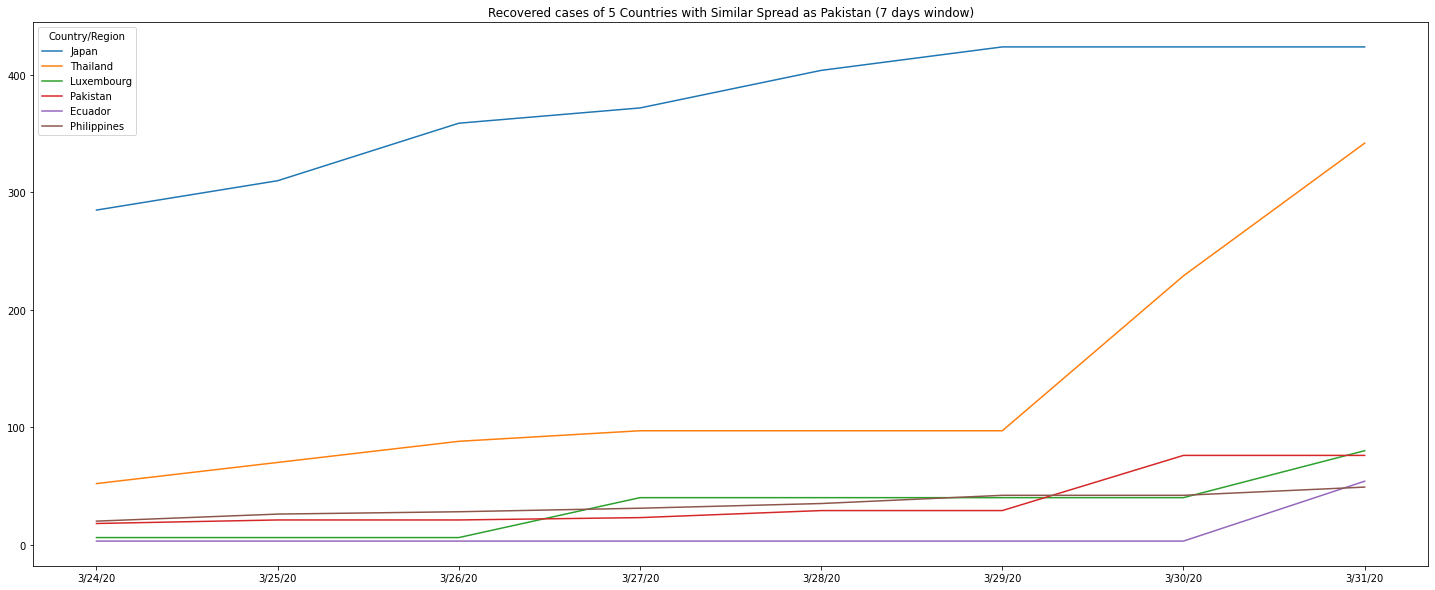

In [210]:
import pandas as pd
import csv
import itertools
import numpy as np
drive.mount('/content/drive')
path = "time_series_covid19_recovered_global.csv"
dataset_2 = pd.read_csv(path)
dataset_2.drop(['4/1/20', '4/2/20', '4/3/20' ,'4/4/20','4/5/20', '4/6/20', '4/7/20', '4/8/20' ,'4/9/20' ,'4/10/20' ,'4/11/20',
 '4/12/20' ,'4/13/20', '4/14/20'], axis = 1, inplace = True) 
dataset_2.drop(dataset_2.columns[2:66],axis=1,inplace=True)
#getting most effected countries
grouped2=dataset_2.groupby('Country/Region')[dataset_2.columns].sum()

grouped2.sort_values('3/31/20', ascending=False,inplace=True)

final=grouped2.T    
def keep_cols(Data, keep_these):
    drop_these = list(set(list(Data)) - set(keep_these))
    return Data.drop(drop_these, axis = 1)

new_data = final.pipe(keep_cols, ['Pakistan', 'Japan','Philippines','Thailand','Ecuador','Luxembourg'])
new_data.plot(figsize=(25,10))
plt.title("Recovered cases of 5 Countries with Similar Spread as Pakistan (7 days window)")


## Bonus
Calculate and plot the min, max, average, median number of days for a patient to recover using one of the data files mentioned above. <br>**Hint:** use `boxplot`